## TP 01: Espacios Cromaticos

In [1]:
from skimage import data, io, filters

In [2]:
import matplotlib.image as mpimg

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank

In [4]:
import seaborn as sns

In [5]:
pwd

'/home/martin/Dropbox/doctorado/chapter00_courses/procesamiento_digital_imagenes'

## Importamos Imagen

In [6]:
img = io.imread('/home/martin/Dropbox/doctorado/chapter00_courses/procesamiento_digital_imagenes/planetario.jpg')

Revisamos la dimensión de la imagen

In [7]:
np.shape(img)

(3120, 4160, 3)

In [8]:
type(img)

numpy.ndarray

Visualizamos la imagen en pantalla

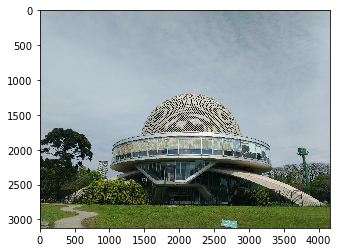

In [9]:
plt.imshow(img)
plt.grid(False)
plt.show()

Normalizamos la imagen

In [10]:
imgnorm = img.astype(float) / 255

In [11]:
print("El Valor máximo en el tensor de la imagen luego de normalización es = " + str(np.max(imgnorm)))

El Valor máximo en el tensor de la imagen luego de normalización es = 1.0


In [12]:
print("El Valor máximo en el tensor de la imagen luego de normalización es = " + str(np.min(imgnorm)))

El Valor máximo en el tensor de la imagen luego de normalización es = 0.0


## Histograma de frecuencias
Realizamos un histograma de cada canal de la imagen para comprender la distrbución a modo descriptivo.

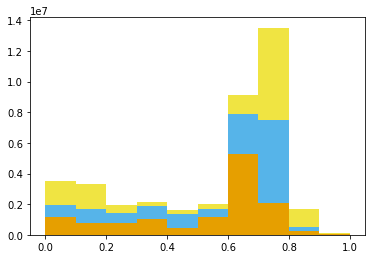

In [13]:
colors = ['#E69F00', '#56B4E9', '#F0E442']
plt.hist([imgnorm[:,:,0].ravel(),imgnorm[:,:,1].ravel(),imgnorm[:,:,2].ravel()], color = colors, stacked= True)
plt.show()

In [14]:
#sns.distplot(imgnorm[:,:,1].ravel())
#sns.distplot(imgnorm[:,:,2].ravel())
#sns.distplot(imgnorm[:,:,0].ravel())
#plt.show()

### Matrices de transformación YIQ y RGB
Definimos las matrices de transformacion

In [15]:
to_yiq = np.array([[0.299,0.587, 0.114], 
                   [0.595716, -0.274453, -0.321263], 
                   [0.211456, -0.522591, 0.311135]])

In [16]:
to_rgb = np.array([[1  ,    0.9663, 0.621], 
                   [1  ,  -0.2721, -0.6474], 
                   [1  ,  -1.107, 1.7046]])

### Llevamos nuestra imagen normalizada al espacio YIQ

Creamos el tensor "yiq" para guardar nuestra imagen normalizada luego de haber sido transformada por "to_yiq".

In [17]:
yiq = np.zeros((np.shape(img)[0],np.shape(img)[1],np.shape(img)[2]))
yiq = np.matmul(imgnorm,to_yiq.T)

Revisamos las dimensiones de nuestra nueva matriz yiq.

In [18]:
np.shape(yiq)

(3120, 4160, 3)

In [19]:
np.min(yiq)

-0.17749647843137256

## Experimento 01: probamos distintos valores de los parámetros alpha y beta.

Definimos los valores de ambos parametros.

In [20]:
alpha = 0.6
beta = 1

Afectamos nuestra matriz yiq por los parametros alpha y beta.

In [21]:
yiq1 = yiq.copy()

In [22]:
yiq1[:,:,0] = yiq[:,:,0]*alpha
yiq1[:,:,1] = yiq[:,:,1]*beta
yiq1[:,:,2] = yiq[:,:,2]*beta

Verificamos que los parametros alpha y beta no saquen al vector yiq de su rango.

In [23]:
yiq1[yiq1[:,:,0] >1,0] = 1

yiq1[yiq1[:,:,1] >0.5957,1] = 0.5957
yiq1[yiq1[:,:,1] <-0.5957,1] = -0.5957
yiq1[yiq1[:,:,2] >0.5226,2] = 0.5226
yiq1[yiq1[:,:,2] <-0.5226,2] = -0.5226

(yiq1[:,:,1] <-0.5226).sum()

0

Creamos un nuevo tensor img21 donde colocaremos la imagen en RGB ya afectada previamente en el espacio YIQ por los nuveos valores de alpha y beta.

In [24]:
img21 = np.zeros((np.shape(img)[0],np.shape(img)[1],np.shape(img)[2]))

img21 = np.matmul(yiq1,to_rgb.T)

img21[img21 >1] = 1
img21[img21 <0] = 0

Verificamos que el maximo y el minimo de la nueva imagen img2 en el espacio RGB este entre los rangos aceptables.

In [25]:
np.max(img21)

0.6316088142023529

In [26]:
np.min(img21)

0.0

Observamos la nueva imagen en el espacio RGB con las modificaciones realizadas (reducir alpha = 0.6). Se observa una reduccion de la luminancia.

In [27]:
#plt.imshow(img21)
#plt.grid(False)
#plt.title("Imagen afectada con alpha = 0.6 y beta = 1. Se observa que valores <1 de alpha reducenla luminancia.")
#plt.show()

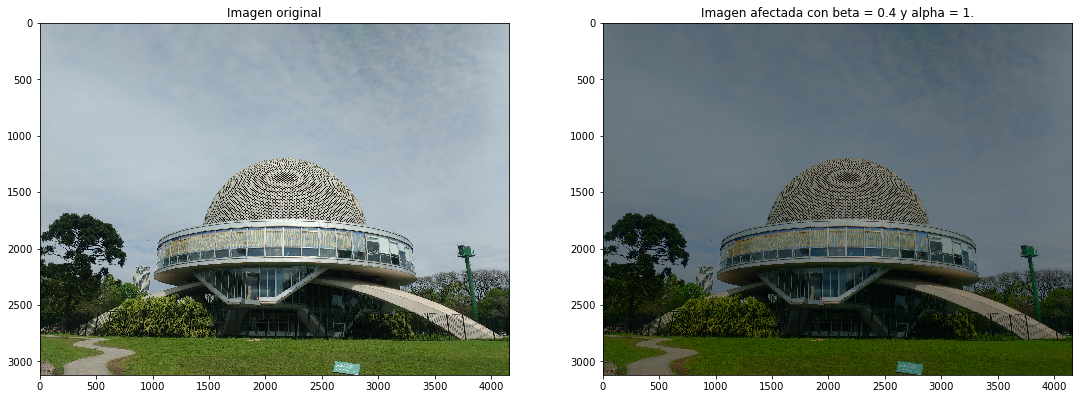

In [28]:
f41 = plt.figure()
f41.set_size_inches(18.5, 10.5)
f41.add_subplot(1,2, 1)
plt.imshow(img)
plt.title("Imagen original")
f41.add_subplot(1,2, 2)
plt.imshow(img21)
plt.title("Imagen afectada con beta = 0.4 y alpha = 1.")
plt.show()

## Experimento 02: probamos distintos valores de los parámetros alpha = 2.5 y beta = 1. 

In [29]:
# verificar que el alpha y beta no saquen al vector yiq de su rango
# verificar que el rgb no se vaya de rango maximo y minimo

In [30]:
alpha = 2.5
beta = 1

In [31]:
yiq2 = yiq.copy()

yiq2[:,:,0] = yiq[:,:,0]*alpha
yiq2[:,:,1] = yiq[:,:,1]*beta
yiq2[:,:,2] = yiq[:,:,2]*beta

yiq2[yiq2[:,:,0] >1,0] = 1

yiq2[yiq2[:,:,1] >0.5957,1] = 0.5957
yiq2[yiq2[:,:,1] <-0.5957,1] = -0.5957
yiq2[yiq2[:,:,2] >0.5226,2] = 0.5226
yiq2[yiq2[:,:,2] <-0.5226,2] = -0.5226

(yiq2[:,:,1] <-0.5226).sum()

img22 = np.zeros((np.shape(img)[0],np.shape(img)[1],np.shape(img)[2]))

img22 = np.matmul(yiq2,to_rgb.T)

img22[img22 >1] = 1
img22[img22 <0] = 0

#plt.imshow(img22)
#plt.grid(False)
#plt.title("Imagen afectada con alpha = 2.5 y beta = 1. Se observa que valores >1 de alpha aumentan considerablemente luminancia.")
#plt.show()

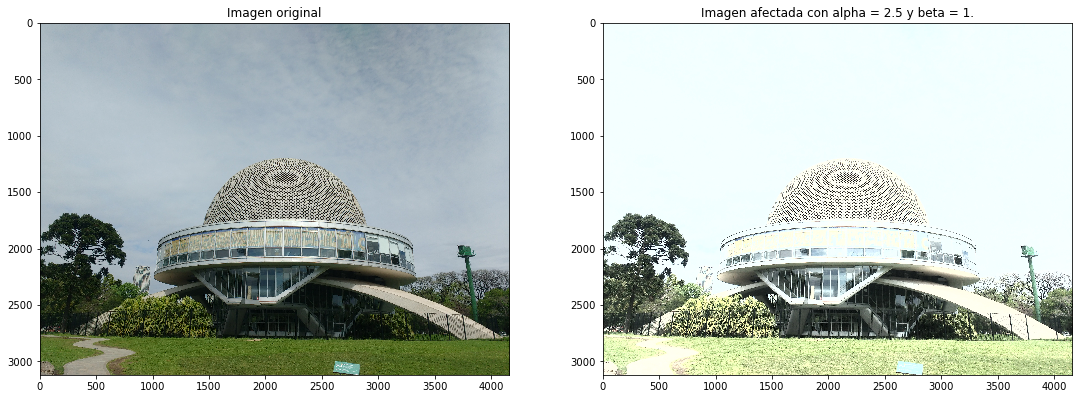

In [32]:
f41 = plt.figure()
f41.set_size_inches(18.5, 10.5)
f41.add_subplot(1,2, 1)
plt.imshow(img)
plt.title("Imagen original")
f41.add_subplot(1,2, 2)
plt.imshow(img22)
plt.title("Imagen afectada con alpha = 2.5 y beta = 1.")
plt.show()

## Experimento 3: Disminuir el parámetro beta = 0.4 y alpha = 1. 

In [33]:
alpha = 1
beta = 0.4

In [34]:
yiq3 = yiq.copy()

yiq3[:,:,0] = yiq[:,:,0]*alpha
yiq3[:,:,1] = yiq[:,:,1]*beta
yiq3[:,:,2] = yiq[:,:,2]*beta

yiq3[yiq3[:,:,0] >1,0] = 1

yiq3[yiq3[:,:,1] >0.5957,1] = 0.5957
yiq3[yiq3[:,:,1] <-0.5957,1] = -0.5957
yiq3[yiq3[:,:,2] >0.5226,2] = 0.5226
yiq3[yiq3[:,:,2] <-0.5226,2] = -0.5226

(yiq3[:,:,1] <-0.5226).sum()

img23 = np.zeros((np.shape(img)[0],np.shape(img)[1],np.shape(img)[2]))

img23 = np.matmul(yiq3,to_rgb.T)

img23[img23 >1] = 1
img23[img23 <0] = 0

#plt.imshow(img23)
#plt.grid(False)
#plt.title("Imagen afectada con beta = 0.4 y alpha = 1. Se observa que valores <1 de beta decrecen la saturación.")
#plt.show()

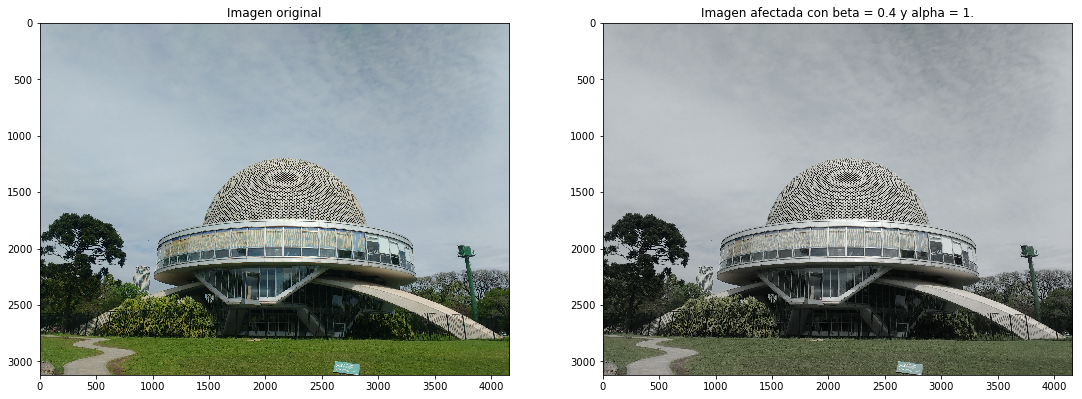

In [35]:
f41 = plt.figure()
f41.set_size_inches(18.5, 10.5)
f41.add_subplot(1,2, 1)
plt.imshow(img)
plt.title("Imagen original")
f41.add_subplot(1,2, 2)
plt.imshow(img23)
plt.title("Imagen afectada con beta = 0.4 y alpha = 1.")
plt.show()

## Experimento 4: Aumentar el parámetro beta = 2.3 y alpha = 1. 

In [36]:
alpha = 1
beta = 2.3

In [37]:
yiq4 = yiq.copy()

yiq4[:,:,0] = yiq[:,:,0]*alpha
yiq4[:,:,1] = yiq[:,:,1]*beta
yiq4[:,:,2] = yiq[:,:,2]*beta

yiq4[yiq4[:,:,0] >1,0] = 1

yiq4[yiq4[:,:,1] >0.5957,1] = 0.5957
yiq4[yiq4[:,:,1] <-0.5957,1] = -0.5957
yiq4[yiq4[:,:,2] >0.5226,2] = 0.5226
yiq4[yiq4[:,:,2] <-0.5226,2] = -0.5226

(yiq4[:,:,1] <-0.5226).sum()

img24 = np.zeros((np.shape(img)[0],np.shape(img)[1],np.shape(img)[2]))

img24 = np.matmul(yiq4,to_rgb.T)

img24[img24 >1] = 1
img24[img24 <0] = 0

#plt.imshow(img24)
#plt.grid(False)
#plt.title("Imagen afectada con beta = 0.4 y alpha = 1. Se observa que valores <1 de beta decrecen la saturación.")
#plt.show()

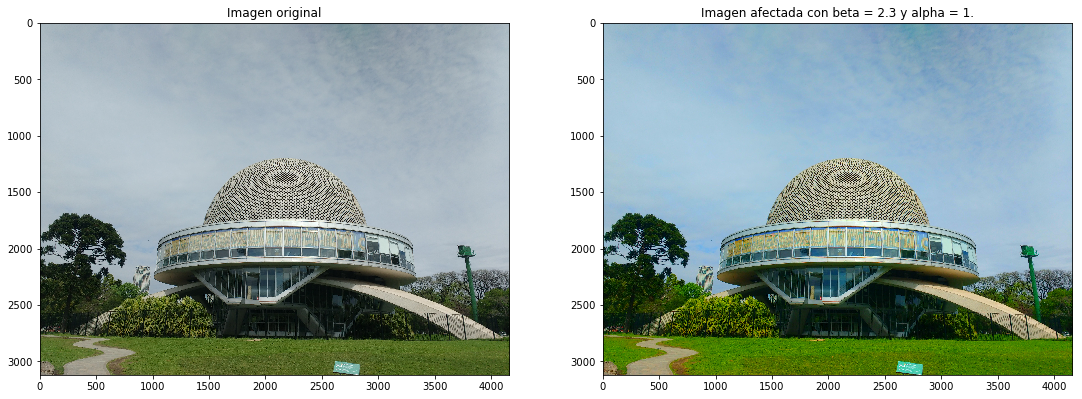

In [38]:
f41 = plt.figure()
f41.set_size_inches(18.5, 10.5)
f41.add_subplot(1,2, 1)
plt.imshow(img)
plt.title("Imagen original")
f41.add_subplot(1,2, 2)
plt.imshow(img24)
plt.title("Imagen afectada con beta = 2.3 y alpha = 1.")
plt.show()

## Experimento 05: Modificaciónes de alpha y beta en simultáneo
alpha = 1.6
beta = 0.5

In [44]:
alpha = 1.6
beta = 0.5

In [45]:
yiq5 = yiq.copy()

yiq5[:,:,0] = yiq[:,:,0]*alpha
yiq5[:,:,1] = yiq[:,:,1]*beta
yiq5[:,:,2] = yiq[:,:,2]*beta

yiq5[yiq5[:,:,0] >1,0] = 1

yiq5[yiq5[:,:,1] >0.5957,1] = 0.5957
yiq5[yiq5[:,:,1] <-0.5957,1] = -0.5957
yiq5[yiq5[:,:,2] >0.5226,2] = 0.5226
yiq5[yiq5[:,:,2] <-0.5226,2] = -0.5226

(yiq5[:,:,1] <-0.5226).sum()

img25 = np.zeros((np.shape(img)[0],np.shape(img)[1],np.shape(img)[2]))

img25 = np.matmul(yiq5,to_rgb.T)

img25[img25 >1] = 1
img25[img25 <0] = 0

#plt.imshow(img24)
#plt.grid(False)
#plt.title("Imagen afectada con beta = 0.4 y alpha = 1. Se observa que valores <1 de beta decrecen la saturación.")
#plt.show()

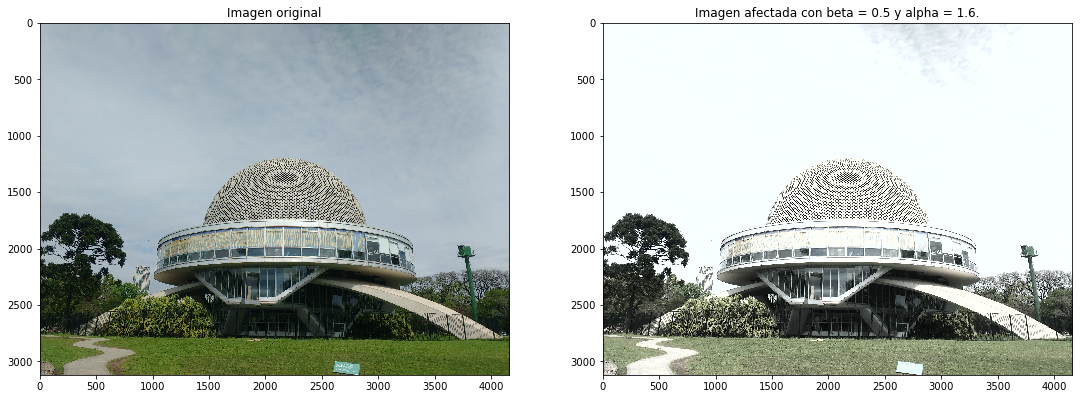

In [47]:
f51 = plt.figure()
f51.set_size_inches(18.5, 10.5)
f51.add_subplot(1,2, 1)
plt.imshow(img)
plt.title("Imagen original")
f51.add_subplot(1,2, 2)
plt.imshow(img25)
plt.title("Imagen afectada con beta = 0.5 y alpha = 1.6.")
plt.show()